In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests

In [107]:
%%writefile my_server.py

import os
import logging.config

import yaml

def setup_logging(
    default_path='logging.yaml',
    default_level=logging.INFO,
    env_key='LOG_CFG'
):
    """Setup logging configuration

    """
    path = default_path
    value = os.getenv(env_key, None)
    if value:
        path = value
    if os.path.exists(path):
        with open(path, 'rt') as f:
            config = yaml.safe_load(f.read())
        logging.config.dictConfig(config)
    else:
        logging.basicConfig(level=default_level)


# # create a file handler
# handler = logging.FileHandler('hello.log')
# handler.setLevel(logging.INFO)

# # create a logging format
# formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
# handler.setFormatter(formatter)

# # add the handlers to the logger
# logger.addHandler(handler)

Writing my_server.py


In [131]:
%run my_server.py LOG_CFG=logging.yaml level=DEBUG

In [ ]:
import logging
#logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO, format='[root] %(levelname)s - %(message)s')
logging.getLogger().setLevel(logging.DEBUG)
logger = logging.getLogger(__name__)

In [137]:
wants=['Siglent SSA3021X','Tektronix RSA306','Signal Hound BB60C','RF Explorer','spectrum analyzer']

In [3]:
url_base = 'https://vancouver.craigslist.ca/search/sss'
params = dict(search_distance=200,postal=v8k2p4)
rsp = requests.get(url_base, params=params)

Example 

In [24]:
url_base = 'http://sfbay.craigslist.org/search/eby/apa'
params = dict(bedrooms=1, is_furnished=0)
rsp = requests.get(url_base, params=params)

In [25]:
print(rsp.url)

https://sfbay.craigslist.org/search/eby/apa?bedrooms=1&is_furnished=0


In [26]:
print(rsp.text[:500])

﻿<!DOCTYPE html>
<html class="no-js"><head>
    <title>SF bay area apts/housing for rent  - craigslist</title>

    <meta name="description" content="SF bay area apts/housing for rent  - craigslist">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge"/>
    <link rel="canonical" href="https://sfbay.craigslist.org/search/eby/apa">
    <link rel="alternate" type="application/rss+xml" href="https://sfbay.craigslist.org/search/eby/apa?format=rss&amp;is_furnished=0&amp;min_bedrooms=1" title="RSS


In [27]:
from bs4 import BeautifulSoup as bs4


In [28]:
html = bs4(rsp.text, 'html.parser')


In [29]:
print(html.prettify()[:1000])

﻿
<!DOCTYPE html>
<html class="no-js">
 <head>
  <title>
   SF bay area apts/housing for rent  - craigslist
  </title>
  <meta content="SF bay area apts/housing for rent  - craigslist" name="description"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible">
   <link href="https://sfbay.craigslist.org/search/eby/apa" rel="canonical"/>
   <link href="https://sfbay.craigslist.org/search/eby/apa?format=rss&amp;is_furnished=0&amp;min_bedrooms=1" rel="alternate" title="RSS feed for craigslist | SF bay area apts/housing for rent  - craigslist" type="application/rss+xml"/>
   <link href="https://sfbay.craigslist.org/search/eby/apa?s=120&amp;is_furnished=0&amp;min_bedrooms=1" rel="next"/>
   <meta content="width=device-width,initial-scale=1" name="viewport"/>
   <link href="//www.craigslist.org/styles/cl.css?v=4a33eaa2c5e2f9087278bddd0bcfce91" media="all" rel="stylesheet" type="text/css"/>
   <link href="//www.craigslist.org/styles/search.css?v=27e1d4246df60da5ffd1146d59a8107e" media="all" 

In [30]:
# find_all will pull entries that fit your search criteria.
# Note that we have to use brackets to define the `attrs` dictionary
# Because "class" is a special word in python, so we need to give a string.
apts = html.find_all('li', attrs={'class': 'result-row'})
print(len(apts))

120


In [31]:
# We can see that there's a consistent structure to a listing.
# There is a 'time', a 'name', a 'housing' field with size/n_brs, etc.
this_appt = apts[15]
print(this_appt.prettify())

<li class="result-row" data-pid="6369990805">
 <a class="result-image gallery" data-ids="1:00Q0Q_c1VKledFQY6,1:00W0W_386WLQro822,1:00m0m_aP9i6eAjFV3,1:01212_6bPL9mOUWvP,1:00p0p_igHq9wzX3uZ,1:00y0y_5QJaZ82jxX8,1:00505_jjzFqfSP35y,1:00b0b_f7c6pgBV0F1,1:00w0w_6eZgGU2rZxl,1:00m0m_bRy1VRQ36UV,1:00303_lnkdclnLRTC,1:00606_8iEfWMYZ1cy,1:00O0O_c8CPd6R6TPP,1:00x0x_iom6Q7lSpq3,1:00r0r_A6c4zTXjx2,1:00S0S_jBBJzg3il2P,1:00X0X_amC7mE4vjXh,1:00C0C_lPx1snVvNmn,1:00W0W_dG1asmZST3y,1:00g0g_7s8EFpDCUfy" href="https://sfbay.craigslist.org/eby/apa/d/completely-remodeled-one/6369990805.html">
  <span class="result-price">
   $3995
  </span>
 </a>
 <p class="result-info">
  <span class="icon icon-star" role="button">
   <span class="screen-reader-text">
    favorite this post
   </span>
  </span>
  <time class="result-date" datetime="2017-11-15 12:15" title="Wed 15 Nov 12:15:46 PM">
   Nov 15
  </time>
  <a class="result-title hdrlnk" data-id="6369990805" href="https://sfbay.craigslist.org/eby/apa/d/completel

In [86]:
# So now we'll pull out a couple of things we might be interested in:
# It looks like "housing" contains size information. We'll pull that.
# Note that `findAll` returns a list, since there's only one entry in
# this HTML, we'll just pull the first item.
size = this_appt.findAll(attrs={'class': 'housing'})[0].text
size

'\n                    4br -\n                    1568ft2 -\n                '

In [181]:
def find_size_and_brs(size):
#     split = size.strip('-\n').strip('/- ').split(' - ')
    split = size.strip(' -\n ').strip(' \t ').strip(' ').replace('\n','').replace('\t','')\
            .replace(' ','').split('-')
    logger.debug(split)
    if len(split) == 2:
        n_brs = split[0].replace('br', '')
        this_size = split[1].replace('ft2', '')
    elif 'br' in split[0]:
        # It's the n_bedrooms
        n_brs = split[0].replace('br', '')
        this_size = np.nan
    elif 'ft2' in split[0]:
        # It's the size
        this_size = split[0].replace('ft2', '')
        n_brs = np.nan
    return float(this_size), float(n_brs)
this_size, n_brs = find_size_and_brs(size)

In [80]:
# Now we'll also pull a few other things:
this_time = this_appt.find('time')['datetime']
this_time = pd.to_datetime(this_time)
this_price = float(this_appt.find('span', {'class': 'result-price'}).text.strip('$'))
this_title = this_appt.find('a', attrs={'class': 'hdrlnk'}).text

In [81]:
print('\n'.join([str(i) for i in [this_size, n_brs, this_time, this_price, this_title]]))

1568.0
4.0
2017-11-15 12:15:00
3995.0
Completely Remodeled One Story Home Located In Desirable Burton Valley


In [82]:
loc_prefixes = ['eby', 'nby', 'sfc', 'sby', 'scz']

In [163]:
def find_prices(results):
    prices = []
    for rw in results:
        price = rw.find('span', {'class': 'result-price'})
        if price is not None:
            price = float(price.text.strip('$'))
        else:
            price = np.nan
        prices.append(price)
    return prices

def find_times(results):
    times = []
    for rw in apts:
        if time is not None:
            time = time['datetime']
            time = pd.to_datetime(time)
        else:
            time = np.nan
        times.append(time)
    return times

In [164]:
np.arange(0, 300, 100)

array([  0, 100, 200])

In [178]:
setup_logging()

None logging.yaml


In [188]:
pwd()


'C:\\Users\\arond\\Documents\\arons random jupyter stuff'

In [182]:
results = []  # We'll store the data here
# Careful with this...too many queries == your IP gets banned temporarily
search_indices = np.arange(0, 300, 100)
for loc in loc_prefixes:
    logger.debug(loc)
    for i in search_indices:
        
        url = 'https://sfbay.craigslist.org/search/{0}/apa'.format(loc)
        logger.debug('%s iteration, url=%s', i, url)
        resp = requests.get(url, params={'bedrooms': 1, 's': i})
        txt = bs4(resp.text, 'html.parser')
        apts = txt.findAll(attrs={'class': "result-row"})
        
        # Find the size of all entries
        size_text = [rw.findAll(attrs={'class': 'housing'})[0].text
                     for rw in apts]
        sizes_brs = [find_size_and_brs(stxt) for stxt in size_text]
        logger.debug('number of bedrooms=%s', sizes_brs)
        sizes, n_brs = zip(*sizes_brs)  # This unzips into 2 vectors
     
        # Find the title and link
        title = [rw.find('a', attrs={'class': 'hdrlnk'}).text
                      for rw in apts]
        links = [rw.find('a', attrs={'class': 'hdrlnk'})['href']
                 for rw in apts]
        
        # Find the time
        time = [pd.to_datetime(rw.find('time')['datetime']) for rw in apts]
        price = find_prices(apts)
        
        # We'll create a dataframe to store all the data
        data = np.array([time, price, sizes, n_brs, title, links])
        col_names = ['time', 'price', 'size', 'brs', 'title', 'link']
        df = pd.DataFrame(data.T, columns=col_names)
        df = df.set_index('time')
        
        # Add the location variable to all entries
        df['loc'] = loc
        results.append(df)

In [183]:
# Finally, concatenate all the results
results = pd.concat(results, axis=0)

In [184]:
# We'll make sure that the right columns are represented numerically:
results[['price', 'size', 'brs']] = results[['price', 'size', 'brs']].convert_objects(convert_numeric=True)
# pd.to_numeric(results['price'])

H:\windows_program_files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


temp=results.groupby('loc')
temp.describe()

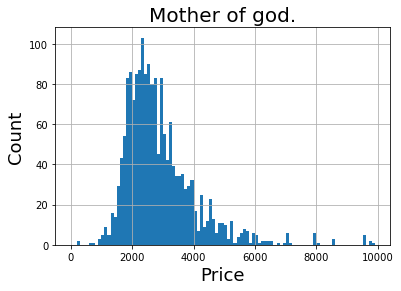

In [185]:
ax = results.hist('price', bins=np.arange(0, 10000, 100))[0, 0]
ax.set_title('Mother of god.', fontsize=20)
ax.set_xlabel('Price', fontsize=18)
ax.set_ylabel('Count', fontsize=18)